# Apresentação:

O objetivo desse código é estudar um pouco sobre a matemática por trás de alguns tópicos euclidianos utilizados na construção e embasamento de um bom modelo de **Regressão Linear**, que é um modelo, em essência, baseado muito na interpretação algébrica da geometria de euclides.

## Documentações:

### API's de Visualização de Dados:
* https://matplotlib.org/stable/
* https://seaborn.pydata.org/

In [88]:
# Bibliotecas Utilizadas:
import numpy as np
import pandas as pd
from sklearn import datasets

# Bibliotecas para Gráficos:
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
# Avaliando datasets:
for element in dir(datasets):
    if element.startswith('load_'): # Checando string do modulo
        try:
            loader = getattr(datasets,element) # utiliza a string como atributo da classe datasets.
            _, y = loader(return_X_y= True)
            print(f'{element} -> {y[:5]}')
        except Exception as e:
            pass

load_breast_cancer -> [0 0 0 0 0]
load_diabetes -> [151.  75. 141. 206. 135.]
load_digits -> [0 1 2 3 4]
load_iris -> [0 0 0 0 0]
load_linnerud -> [[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]
load_wine -> [0 0 0 0 0]


**Função `getattr`:**

A função `getattr`serve justamente para esse propósito de pegar uma *string* e considerar como um elemente estrutural do código python, ou seja, eu entro como uma string que ele considera ela como um atributo/método de uma função de python. É muito útil para o contexto aplicado no código.

# Dados Utilizados:

Para o estudo, eu vou utilizar o conjunto de dados [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#load-diabetes) cuja me parecem os mais adequados.
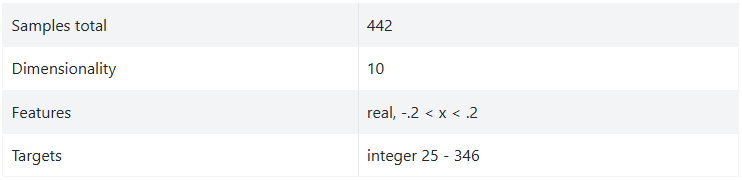

Uma regressão, por definição, o nome dado ao problema de predição quando $y \in \mathbb{R}$, ou seja, a nossa variável alvo está nos contínuos. A estruturação de modelos de Classificação e de Regressão são diferentes, e entender o domínio de $y$ é fundamental para a construção adequada do processo.

In [133]:
# Aquisitando dados:
dados = datasets.load_diabetes();dados.keys() # Eu gosto de trazer tudo.

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [22]:
# Descrição dos dados:
print(dados['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [81]:
df = pd.concat([pd.DataFrame(dados.data,columns=dados.feature_names),
                         pd.DataFrame(dados.target,columns=["target"])],axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [82]:
# Avaliando Metadados:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Um *toy dataset*, ou seja, um conjunto de dados bem comportado. Já da para ver que não tem dados faltantes, as variáveis estão tipadas de forma adequada, tudo dentro dos conformes. Porém há outras formas de avaliar esseas questões.

In [83]:
# Checando valores faltantes:
count = 0
for col in df.columns:
    # Contando NaN's:
    totalNaN = df[col].isna().sum()
    count += totalNaN

    # Informando:
    if totalNaN != 0:
        print(f'{col} -> {totalNaN}')
        
if count == 0:
    print('Sem valores faltantes na base de dados')

Sem valores faltantes na base de dados


In [84]:
# Estatísticas Descritivas:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# Modelo Linear Simples:

Vamos começar avaliando o modelo linear simples, ou seja, o modelo construido com apenas uma única regressora. Para isso, a ideia e encontra o modelo cuja possui a melhor correlação com o nossa variável resposta.

## Correlação:

A correlação é uma medida de associação euclidiana, ou seja, ela mede a associabilidade linear entre os dados. Isso é um ponto importante a se comentar, pois em geral, correlação não significa independência. Por definição, independência significa nenhum tipo de associação entre as variáveis. Todavia, outro ponto importante a se comentar é que, quando a distribuição é $\text{Normal}$, ausência de correlação significa independência. Dito isso, é importante dizer que existem tipos diferentes de correlação, que são calculadas de formas diferentes. Aqui utilizaremos a [Correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)

## Correlação de Pearson:

Uma interpretação que eu gosto de  [Desigualdade de Cauchy-Schwarz](https://pt.wikipedia.org/wiki/Desigualdade_de_Cauchy-Schwarz), que é definida como,

$$|\textbf{u} \cdot \textbf{v}| = ||\textbf{u}||\ ||\textbf{v}||$$

Onde $\textbf{u},\textbf{v} \in \mathbb{R}^n$ e $n \in \mathbb{N}$. Note que o modulo geraria uma desigualdade, de modo que,

$$-1 \le \frac{|\textbf{u} \cdot \textbf{v}|}{||\textbf{u}||\ ||\textbf{v}||} \le 1$$

De modo que podemos então definir a **Correlação de Pearson** efetivamente como,

$$\rho \triangleq \text{Corr[\textbf{x},\textbf{y}]} \triangleq \frac{Cov(\textbf{x},\textbf{y})}{\sqrt{\text{var(\textbf{x})}\cdot\text{var(\textbf{y})}}} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2\cdot \sum_{i=1}^n(y_i - \bar{y})^2}}$$

In [68]:
def pearsonCorrelation(x,y):
    '''
    Objetivo da função é calcular a correlação de Pearson,
    baseado na definição interpretação algébrica.

    # Entradas:
    numpy.obj: Primeiro Vetor;
    numpy.obj: Segundo Vetor.

    # Saída:
    float: Coeficiente de Pearson, [-1,1].
    '''

    # Avaliando dimensionalidade:
    if x.shape != y.shape:
        print('Não é possível calcular o coeficiente de pearson para vetores de dimensões diferentes.')
        return

    # Médias:
    xbar = np.mean(x)
    ybar = np.mean(y)

    # Numerador:
    numerador = 0
    for i in range(len(x)):
        numerador += (x[i]-xbar)*(y[i]-ybar)

    # Denominador:
    varx = np.sum((x - xbar)**2)
    vary = np.sum((y - ybar)**2)
    denominador = np.sqrt(varx*vary)

    ro = numerador/denominador

    return ro    

In [103]:
# Correlações:
corr = [pearsonCorrelation(df[col],df['target']) for col in df.columns];corr

[0.18788875071891983,
 0.043061998451605375,
 0.5864501344746886,
 0.4414817585625706,
 0.2120224810145507,
 0.17405358696874246,
 -0.39478925067091875,
 0.4304528847447728,
 0.5658825924427447,
 0.3824834842485815,
 1.0]

Poderiamos também efetuar o mesmo processo de calculo de correlação com uma função própria do Pandas. O que facilitaria bastante o processo.

In [113]:
corrPandas = [df[col].corr(df['target']) for col in df.columns];corrPandas

[0.18788875071891983,
 0.04306199845160532,
 0.5864501344746884,
 0.44148175856257094,
 0.2120224810145506,
 0.17405358696874254,
 -0.3947892506709185,
 0.43045288474477267,
 0.5658825924427437,
 0.3824834842485812,
 1.0]

In [116]:
# Comparando Respostas:
for i in range(len(corr)):
    for j in range(len(corrPandas)):
        if i == j:
            if corr[i] == corrPandas[j]:
                print(True)
            else:
                print(f'{corr[i]}, {corrPandas[j]}')

True
0.043061998451605375, 0.04306199845160532
0.5864501344746886, 0.5864501344746884
0.4414817585625706, 0.44148175856257094
0.2120224810145507, 0.2120224810145506
0.17405358696874246, 0.17405358696874254
-0.39478925067091875, -0.3947892506709185
0.4304528847447728, 0.43045288474477267
0.5658825924427447, 0.5658825924427437
0.3824834842485815, 0.3824834842485812
True


Acredito que dê pra considerar esses erros como erros numéricos, de modo que podemos concluir que ambos os resultados são virtualmente os mesmos.

In [119]:
# Modo alternativo de Comparar as Respostas:
if len(corr) == len(corrPandas):
    for i in range(len(corrPandas)):
        if corr[i] == corrPandas[i]:
            print(True)
        else:
            print(f'{corr[i]}, {corrPandas[i]}')
else:
    print('Vetores de tamanhos diferentes')

True
0.043061998451605375, 0.04306199845160532
0.5864501344746886, 0.5864501344746884
0.4414817585625706, 0.44148175856257094
0.2120224810145507, 0.2120224810145506
0.17405358696874246, 0.17405358696874254
-0.39478925067091875, -0.3947892506709185
0.4304528847447728, 0.43045288474477267
0.5658825924427447, 0.5658825924427437
0.3824834842485815, 0.3824834842485812
True


Uma boa forma de visualizar esses dados, tendo em vista que são dados de contagem, é utilizando gráficos de barra. Graficos de barra são ótimas formas de visualizar a informação nesse contexto. Para construir um gráfico estéticamente bem feito, eu vou trabalhar as variáveis para facilitar a minha visualização da informação.

In [136]:
dados.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [153]:
# Ajustando vetor de features:
varNames = dados.feature_names.copy() # Sem o copy, eu to alterando diretamente as "feature_names"!
varNames.append('target')

# Dataframe de Correlações:
dfCorr = pd.DataFrame(corr, columns=['Correlations'], index=varNames)

# Ordenando Valores:
dfCorr.sort_values(by="Correlations", ascending=True, inplace=True);dfCorr

,Correlations
s3,-0.394789
sex,0.043062
s2,0.174054
age,0.187889
s1,0.212022
s6,0.382483
s4,0.430453
bp,0.441482
s5,0.565883
bmi,0.586450


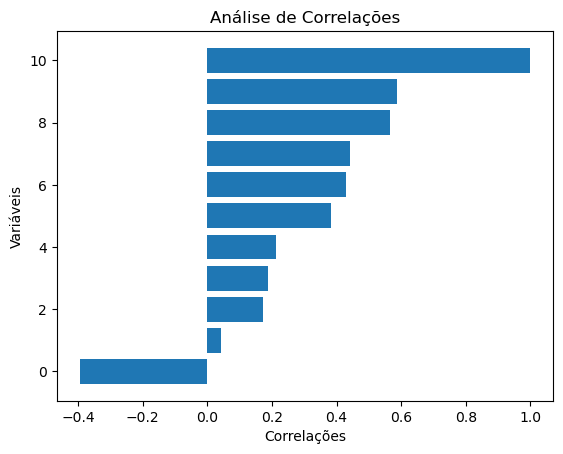

In [100]:
# Visualização (Matplotlib):
indices = np.arange(len(corr))

# Visualização:
plt.barh(indices,corr[::-1])

# Ajuste do Gráfico:
plt.title('Análise de Correlações')
plt.xlabel('Correlações')
plt.ylabel('Variáveis')
plt.show()

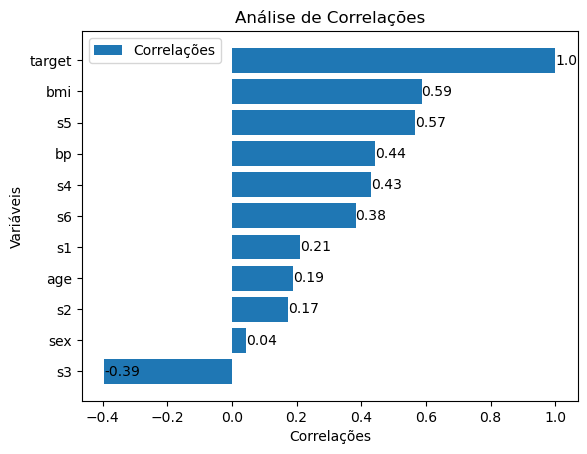

In [172]:
# Visualização:
plt.barh(dfCorr.index,dfCorr['Correlations'],label='Correlações')

# Adicionando os valores nas barras usando .iloc[]
for i in range(len(dfCorr)):
    plt.text(dfCorr['Correlations'].iloc[i], i, round(dfCorr['Correlations'].iloc[i], 2),
             ha='left', va='center', color='black')

# Ajuste do Gráfico:
plt.title('Análise de Correlações')
plt.xlabel('Correlações')
plt.ylabel('Variáveis')
plt.legend()
plt.show()

Um outro coeficiente interessante de se ver, no contexto de regressão linear, é o coeficiente de determinação. Que pode ser obtido, nesse contexto, como $\rho^2$.

In [169]:
dfCorr['Coeficiente de Determinação'] = dfCorr['Correlations']**2

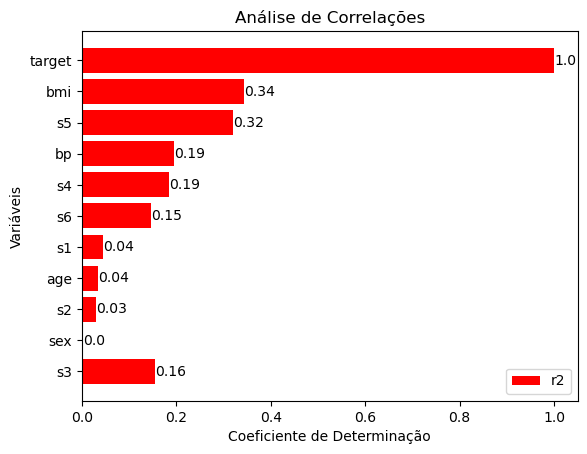

In [170]:
# Visualização:
plt.barh(dfCorr.index,dfCorr['Coeficiente de Determinação'],label='r2',color='red')

# Adicionando os valores nas barras usando .iloc[]
for i in range(len(dfCorr)):
    plt.text(dfCorr['Coeficiente de Determinação'].iloc[i], i, round(dfCorr['Coeficiente de Determinação'].iloc[i], 2),
             ha='left', va='center', color='black')

# Ajuste do Gráfico:
plt.title('Análise de Correlações')
plt.xlabel('Coeficiente de Determinação')
plt.ylabel('Variáveis')
plt.legend()
plt.show()

In [87]:
# Utilizando o método do pandas:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


A diferença é que aqui eu tenho uma matriz de correlações, ou seja, a correlação de todas as variaveis contra todas as variáveis. Isso é uma ótima ferramente para availiar multicolinearidade. Que é um outro tópico importante da regressão.